# Classification with Scikit Learn Long

Classification is a supervised learning technique useful when we want to predict discrete variables (like binary outcomes or belonging to a specific class).

- Pandas Documentation: http://pandas.pydata.org/
- Scikit Learn Documentation: http://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: http://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Classification with 1 feature and a binary target

In [2]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [3]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


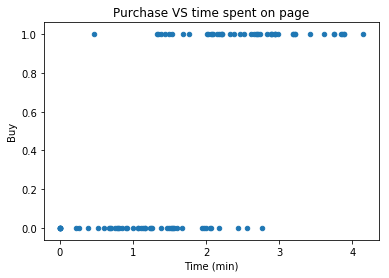

In [4]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Purchase VS time spent on page');

### Features

Let's ignore train/test split for now, we have few data

In [5]:
X = df[['Time (min)']].values
y = df['Buy'].values

### Linear Regression fail

Let's try to fit this with a linear regression first, it won't give correct results

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Visual comparison of predictions

In [8]:
y_pred = model.predict(X)

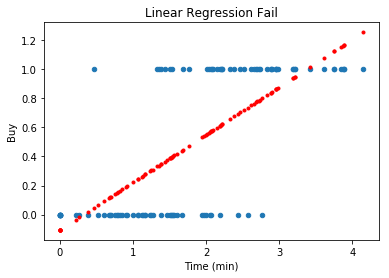

In [9]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Linear Regression Fail')
plt.plot(X, y_pred, '.r');

### Exercise: Logistic Regression

1. Replace the above model with a `LogisticRegression` and repeat the process. What results do you get?
2. Use the method `model.predict_proba` to also predict the probability of a predicted class

In [13]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Logistic Regression Success')
plt.plot(X, y_pred, '.r');

In [ ]:
y_pred_prob = model.predict_proba(X)

In [ ]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Logistic Regression Success')
plt.plot(X, y_pred_prob[:, 1], '.r');

## Classification with 2 features and a binary target

In [ ]:
df = pd.read_csv('../data/isp_data.csv')

In [ ]:
df.head()

In [ ]:
df.label.unique()

In [ ]:
import seaborn as sns

In [ ]:
grid = sns.pairplot(df, hue='label', vars=['download', 'upload'])
grid.fig.suptitle('Internet Service Providers');

In [ ]:
X = df[['download', 'upload']].values
y = df['label'].values

### Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state=0)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Performance evaluation

In [16]:
model.score(X_train, y_train)

0.7761194029850746

In [17]:
model.score(X_test, y_test)

0.9393939393939394

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))

[[17  1]
 [ 1 14]]


In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        18
          1       0.93      0.93      0.93        15

avg / total       0.94      0.94      0.94        33



## Classification with more features and more targets

In [ ]:
df = pd.read_csv('../data/car.csv', dtype='category')

In [ ]:
df.head()

In [ ]:
df.info()

### 1-hot encoding of features

In [ ]:
features = df.drop('class', axis=1)

In [ ]:
X = pd.get_dummies(features)

In [ ]:
X.head()

### Label encoding

In [ ]:
df['class'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
le.classes_

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Fit a Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

# Exercises

### Exercise 1: 

- Benchmark your prediction. as you may have noticed, the labels are highly imbalanced, with most of the data falling in the `{"unacc": 2}` category. What score would you have gotten if you had predicted 2 for all of your test data? 
- Print a confusion matrix of the test predictions. Which classes get confused?
- Repeat the classification with the Logistic Regression model, does it improve the accuracy?

### Exercise 2

- load the churn dataset `../data/churn.csv`
- assign the `Churn` column to a variable called `y`
- assign the other columns to a variable called `features`
- separate numerical columns with `features.select_dtypes`
- split data into train/test with test_size=0.3 and random_state=42
- classify the resulting data using Decision Tree classifier
- try to improve the score changing any of the default initialization parameters of the classifier:
    - max_depth
    - min_samples_split
    - min_samples_leaf
    - max_features
- try to improve the score using a `LogisticRegression`
- try to improve the score using any other of the classifiers used [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
